<a href="https://colab.research.google.com/github/shuishui658/quant-trading/blob/main/quant1_gold_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install akshare
import numpy as np
import pandas as pd
import akshare as ak
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文显示
plt.rcParams['axes.unicode_minus'] = False   # 负数显示
from datetime import datetime

# 数据集准备
## 爬取数据
df = ak.fund_etf_hist_em(symbol='518880', period='daily', start_date='20130801', end_date='20240523')
#这是用AkShare库从东方财富网爬取基金（ETF）历史行情数据,symbol='518880'表示具体的ETF代码，这里是华安黄金ETF,period='daily'按日度频率获取数据。
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2013-08-01,2.653,2.643,2.656,2.635,300064,7.932452e+07,0.79,-0.53,-0.014,0.36
1,2013-08-02,2.630,2.578,2.632,2.558,330219,8.577813e+07,2.80,-2.46,-0.065,0.40
2,2013-08-05,2.621,2.630,2.642,2.621,240120,6.316635e+07,0.81,2.02,0.052,0.29
3,2013-08-06,2.620,2.591,2.620,2.586,223361,5.808451e+07,1.29,-1.48,-0.039,0.27
4,2013-08-07,2.562,2.574,2.582,2.560,195019,5.005002e+07,0.85,-0.66,-0.017,0.23
...,...,...,...,...,...,...,...,...,...,...,...
2623,2024-05-17,5.406,5.416,5.418,5.397,2336818,1.263240e+09,0.39,-0.02,-0.001,2.80
2624,2024-05-20,5.519,5.550,5.586,5.519,4070430,2.258323e+09,1.24,2.47,0.134,4.87
2625,2024-05-21,5.549,5.481,5.549,5.471,3495102,1.922435e+09,1.41,-1.24,-0.069,4.18
2626,2024-05-22,5.500,5.492,5.514,5.480,1887946,1.037492e+09,0.62,0.20,0.011,2.26


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas

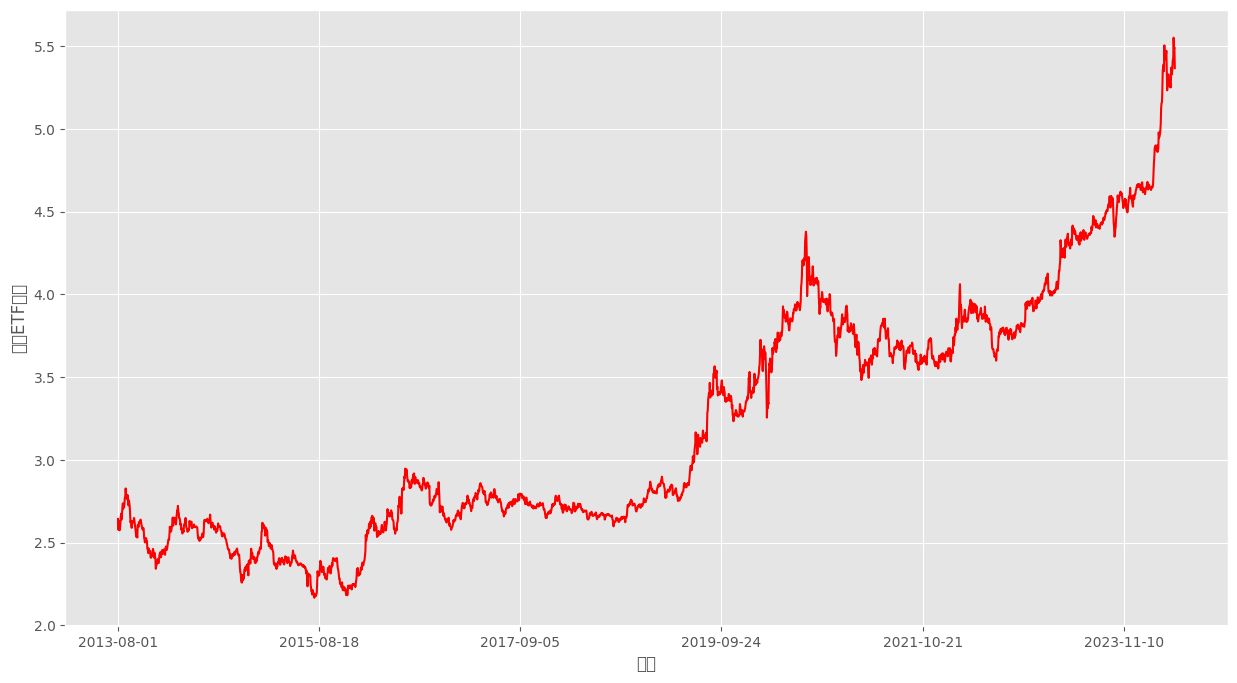

In [19]:
df = df.set_index("日期")
df = df[["收盘"]]
df.columns = ["close"]

df.close.plot(figsize=(15, 8), color='red')
plt.ylabel('黄金ETF价格')
# plt.title('黄金ETF价格序列')
plt.show()

In [20]:
## 因子构建
# 计算均线因子ma55,ma60
df['S1'] = df['close'].rolling(window=55).mean()
#在df中新增名为'S1'的一列，用来存储过去55天的收盘价的均值
df['S4'] = df['close'].rolling(window=60).mean()
# Df['S2'] = Df['close'].rolling(window=10).mean()
# Df['S3'] = Df['close'].rolling(window=20).mean()
df

,close,S1,S4
日期,,,
2013-08-01,2.643,NaN,NaN
2013-08-02,2.578,NaN,NaN
2013-08-05,2.630,NaN,NaN
2013-08-06,2.591,NaN,NaN
2013-08-07,2.574,NaN,NaN
...,...,...,...
2024-05-17,5.416,5.118000,5.078117
2024-05-20,5.550,5.134345,5.093217
2024-05-21,5.481,5.149527,5.107200


In [21]:
## 标签构建
df['next_day_close'] = df['close'].shift(-1)
#新增'next_day_close'这一列用来存储将'close'向上移动一行的数据：比如5.1这天，'next_day_close'就存储5.2的收盘价
df = df.dropna()
df

,close,S1,S4,next_day_close
日期,,,,
2013-11-01,2.602,2.662200,2.657283,2.584
2013-11-04,2.584,2.662164,2.656300,2.582
2013-11-05,2.582,2.661545,2.656367,2.578
2013-11-06,2.578,2.660073,2.655500,2.589
2013-11-07,2.589,2.658509,2.655467,2.573
...,...,...,...,...
2024-05-16,5.417,5.103709,5.065550,5.416
2024-05-17,5.416,5.118000,5.078117,5.550
2024-05-20,5.550,5.134345,5.093217,5.481


In [22]:
## 拆分训练集和测试集
df.index = pd.to_datetime(df.index)#把df的索引（index）转成datetime时间格式。
df_train = df[df.index < datetime.strptime("2024-01-01", "%Y-%m-%d")]#从df里筛选出2024年1月1日之前的全部数据。
#datetime.strptime("2024-01-01", "%Y-%m-%d")把"2024-01-01"这个字符串转换成datetime类型，格式为年-月-日。
df_test = df[df.index >= datetime.strptime("2024-01-01", "%Y-%m-%d")]
features = ['S1', 'S4']#这两个因子作为模型输入（特征/Features）。
x_train = df_train[features]
y_train = df_train["next_day_close"]
x_test = df_test[features]
y_test = df_test["next_day_close"]

In [23]:
# 模型训练
# 创建线性回归模型并训练
linear = LinearRegression(fit_intercept=True).fit(x_train, y_train)#fit_intercept=True：表示自动计算截距项（intercept）
print("最终线性回归拟合的系数为：",linear.coef_, linear.intercept_)

最终线性回归拟合的系数为： [ 6.55489647 -5.55171029] 0.0015753926564712195


In [24]:
# 模型评价
predicted_close = linear.predict(x_test)
#linear.predict(x_test)：用你前面训练好的线性回归模型，对测试集的特征x_test（S1, S4）进行预测。预测的结果是一个numpy数组，是每一条测试样本对应的预测值（next_day_close 的预测值）。
predicted_close = pd.DataFrame(predicted_close, index=y_test.index, columns=['pred_close'])#把预测结果转成DataFrame。
y_test_pred = pd.concat([pd.DataFrame(y_test), predicted_close], axis=1)
#pd.DataFrame(y_test)：把测试集的真实标签 y_test（next_day_close）也变成DataFrame形式。
#pd.concat([...], axis=1)：按列（axis=1）拼接
y_test_pred

,next_day_close,pred_close
日期,,
2024-01-02,4.663,4.680505
2024-01-03,4.651,4.673168
2024-01-04,4.664,4.661035
2024-01-05,4.650,4.649626
2024-01-08,4.649,4.633273
...,...,...
2024-05-16,5.416,5.333394
2024-05-17,5.550,5.357303
2024-05-20,5.481,5.380615


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from font(s) DejaVu Sans.
  fig.canvas

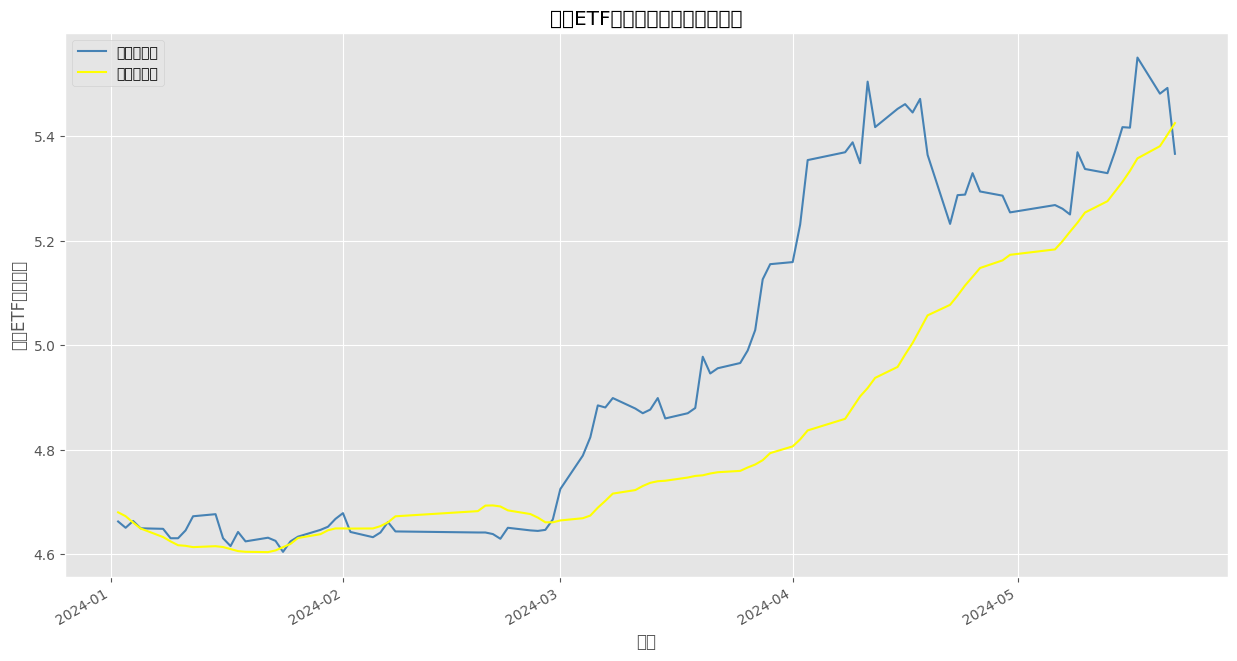

In [25]:
#可视化
y_test_pred[['next_day_close',"pred_close"]].plot(figsize=(15, 8), color=['SteelBlue', 'Yellow'], title='黄金ETF价格择时策略净值曲线图')
plt.legend(['实际的价格', '预测的价格'])
plt.ylabel('黄金ETF的收盘价')
plt.show()

In [26]:
## 决定系数R2
r2_train = linear.score(x_train, y_train)
r2_test = linear.score(x_test, y_test)
print('训练集决定系数: %.4f' %r2_train)
print('测试集决定系数: %.4f' %r2_test)


训练集决定系数: 0.9829
测试集决定系数: 0.5826


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas

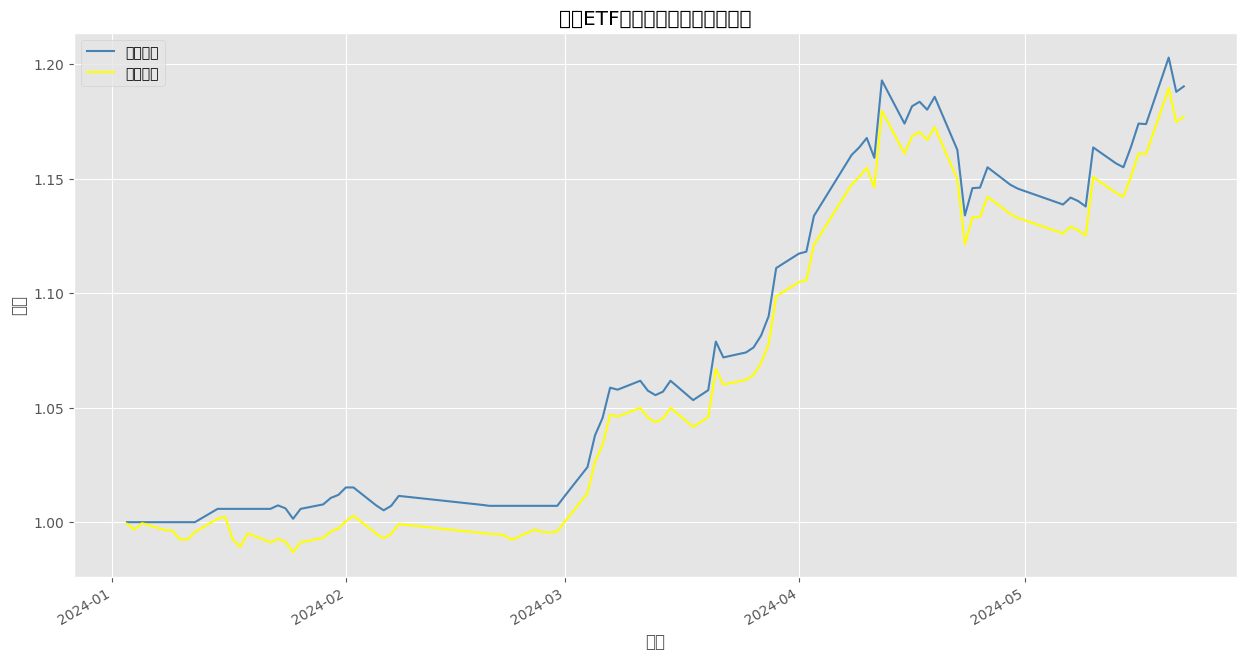

In [29]:
# 只考虑测试集当中的数据
gold = pd.DataFrame()
gold["close"] = df_test["close"]
gold["returns"] = gold["close"].pct_change()#pct_change()：计算每日收益率（今天的涨幅=(今天价格/昨天价格)-1）
gold["pred_close"] = y_test_pred["pred_close"]

gold['signal'] = np.where(gold.pred_close.shift(-1) > gold.pred_close, 1, 0)
#构建交易信号（signal）：如果预测的价格今天低于明天的预测，说明看涨，产生买入信号（1）。否则不买（0）。
#.shift(-1)把预测价格向上移动一行（明天的预测）
#>gold.pred_close	判断明天的预测价>今天的预测价？
#np.where(condition, 1, 0)	如果条件成立 → 返回 1（买入），否则 0（空仓）

gold['strategy_returns'] = gold['signal'].shift(1) * gold['returns']
#策略收益 = 昨天是否持仓（signal）×当天市场收益率（returns）。

gold['strategy_nv'] = (gold['strategy_returns'] + 1).cumprod()
#累计收益：cumprod()累计连乘。
gold['base_nv'] = (gold['returns'] + 1).cumprod()
# 绘制净值曲线图
gold[['strategy_nv','base_nv']].plot(figsize=(15, 8), color=['SteelBlue', 'Yellow'], title='黄金ETF价格择时策略净值曲线图')
plt.legend(['策略净值', '基准净值'])
plt.ylabel('净值')
plt.show()


In [31]:
# 计算夏普率
strategy_sharpe = gold['strategy_returns'].mean() / gold['strategy_returns'].std() * (250**0.5)
base_sharpe = gold['returns'].mean() / gold['returns'].std() * (250**0.5)
#gold['strategy_returns'].mean()：策略的日均收益。
#gold['strategy_returns'].std()：策略的收益率标准差（波动率）。
#(250**0.5)：把日度夏普率年化（假设一年有250个交易日）。
print('策略夏普率: %.2f' %strategy_sharpe)
print('基准夏普率: %.2f' %base_sharpe)


策略夏普率: 3.73
基准夏普率: 3.42
